In [1]:
import numpy as np

In [2]:
def loadDataSet(fileName):
    with open(fileName) as f:
        numFeat = len(f.readline().split('\t')) - 1 
    with open(fileName) as f:
        dataMat = []; labelMat = []
        for line in f.readlines():
            lineArr = []
            curLine = line.strip().split('\t')
            for i in range(numFeat):
                lineArr.append(float(curLine[i]))
            dataMat.append(lineArr)
            labelMat.append(float(curLine[-1]))
    return np.array(dataMat), np.array(labelMat)

def standRegres(xArr, yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr)
    xTx = xMat.T * xMat
    if np.linalg.det(xTx) == 0.0:   # 计算行列式
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T * yMat.T)
    return ws 

In [3]:
xArr, yArr = loadDataSet('ex0.txt')
xArr[0:2]

array([[1.      , 0.067732],
       [1.      , 0.42781 ]])

In [4]:
ws = standRegres(xArr, yArr)
ws

matrix([[3.00774324],
        [1.69532264]])

In [5]:
xMat = np.mat(xArr)
yMat = np.mat(yArr).T
yHat = xMat * ws 
xMat.shape, yMat.shape, yHat.shape

((200, 2), (200, 1), (200, 1))

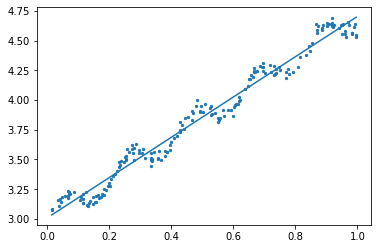

In [6]:
import matplotlib.pyplot as plt 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:, 1].flatten().A[0], yMat[:,0].flatten().A[0], s = 5)
xCopy = xMat.copy()
xCopy.sort(0)
yHat = xCopy * ws 
ax.plot(xCopy[:,1], yHat)
plt.show()

In [7]:
yHat = xMat * ws 
np.corrcoef(yHat.T.A, yMat.T.A)

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

In [8]:
# 局部加权线性回归

def lwlr(testPoint, xArr, yArr, k=1.0):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T 
    m = xMat.shape[0]
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diffMat = testPoint - xMat[j, :]
        weights[j,j] = np.exp(diffMat * diffMat.T / (-2.0*k**2))
    xTx = xMat.T * (weights * xMat)
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return 
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

def lwlrTest(testArr, xArr, yArr, k=1.0):
    m = testArr.shape[0]
    yHat = np.zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    return yHat

In [9]:
xArr, yArr = loadDataSet('ex0.txt')

In [10]:
lwlr(xArr[0], xArr, yArr, 1.0)

matrix([[3.12204471]])

In [11]:
lwlr(xArr[0], xArr, yArr, 0.001)

matrix([[3.20175729]])

In [12]:
yHat = lwlrTest(xArr, xArr, yArr, 0.01)

In [13]:
xMat = np.mat(xArr)
srtInd = xMat[:, 1].argsort(0)
xSort = xMat[srtInd][:, 0, :]

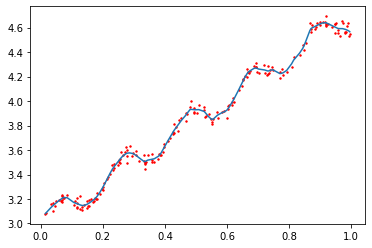

In [14]:
import matplotlib.pyplot as plt 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:, 1], yHat[srtInd])
ax.scatter(xArr[:,1], yArr, s=2, c='red')

In [15]:
# 预测鲍鱼年龄

def rssError(yArr, yHatArr):
    return ((yArr - yHatArr)**2).sum()

In [16]:
abX, abY = loadDataSet('abalone.txt')
yHat01 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 0.1)
yHat1 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 1)
yHat10 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 10)

In [17]:
print(rssError(abY[0:99], yHat01.T))
print(rssError(abY[0:99], yHat1.T))
print(rssError(abY[0:99], yHat10.T))

56.78420911837319
429.8905618703138
549.1181708827038


In [18]:
yHat01 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 0.1)
yHat1 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 1)
yHat10 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 10)
print(rssError(abY[100:199], yHat01.T))
print(rssError(abY[100:199], yHat1.T))
print(rssError(abY[100:199], yHat10.T))

25119.417511792763
573.5261441897468
517.571190538318


In [19]:
ws = standRegres(abX[0:99], abY[0:99])
yHat = np.mat(abX[100:199]) * ws 
rssError(abY[100:199], yHat.T.A)

518.6363153249081

In [45]:
# 岭回归

def ridgeRegres(xMat, yMat, lam=0.2):
    xTx = xMat.T * xMat
    denom = xTx + np.eye(xMat.shape[1]) * lam 
    if np.linalg.det(denom) == 0.0 :
        print("This matrix is singular, cannot do inverse")
        return 
    ws = denom.I * (xMat.T * yMat)
    return ws 

def ridgeTest(xArr, yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T 
    yMean = np.mean(yArr, 0)
    yMat = yMat - yMean 
    Xmeans = np.mean(xMat, 0)
    xVar = np.var(xMat, 0)
    xMat = (xMat - Xmeans) / xVar
    numTestPts = 30 
    wMat = np.zeros((numTestPts, xMat.shape[1]))
    for i in range(numTestPts):
        ws = ridgeRegres(xMat, yMat, np.exp(i-5))
        wMat[i, :] = ws.T 
    return wMat

In [46]:
abX, abY = loadDataSet('abalone.txt')
ridgeWeights = ridgeTest(abX, abY)

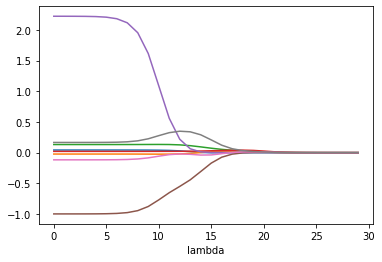

In [47]:
import matplotlib.pyplot as plt 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgeWeights)
plt.xlabel('lambda')
plt.show()

In [50]:
# 前向逐步线性回归

def regularize(xMat):#regularize by columns
    inMat = xMat.copy()
    inMeans = np.mean(inMat,0)   #calc mean then subtract it off
    inVar = np.var(inMat,0)      #calc variance of Xi then divide by it
    inMat = (inMat - inMeans)/inVar
    return inMat

def rssError(yArr,yHatArr): #yArr and yHatArr both need to be arrays
    return ((yArr-yHatArr)**2).sum()

def stageWise(xArr, yArr, eps=0.01, numIt=100):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T 
    yMean = np.mean(yArr, 0)
    yMat = yMat - yMean
    xMat = regularize(xMat)
    m,n = xMat.shape 
    returnMat = np.zeros((numIt, n))
    ws = np.zeros((n,1)); wsTest = ws.copy(); wsMax = ws.copy()

    for i in range(numIt):
        # print(ws.T) 
        lowestError = np.inf 
        for j in range(n):
            for sign in [-1, 1]:
                wsTest = ws.copy()
                wsTest[j] += eps * sign
                yTest = xMat * wsTest 
                rssE = rssError(yMat.A, yTest.A)
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest 
        ws = wsMax.copy()
        returnMat[i,:] = ws.T 
    return returnMat

In [51]:
xArr, yArr = loadDataSet('abalone.txt')
stageWise(xArr, yArr, 0.01, 200)

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.04,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36]])

In [53]:
res = stageWise(xArr, yArr, 0.001, 5000)

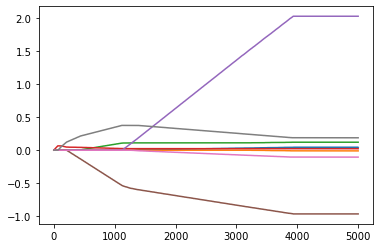

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(res)
plt.show()